In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
%pylab notebook
# import some common libraries
import numpy as np
import os, json, cv2, random
import torch
%matplotlib inline
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer, default_argument_parser, default_setup, hooks, launch
import glob
from detectron2.checkpoint import DetectionCheckpointer

Populating the interactive namespace from numpy and matplotlib


In [4]:
l = glob.glob('/home/tookai-/payanname/jadid/BMaskR-CNN/projects/BMaskR-CNN/datasets/coco/val2017/*.jpg')

In [5]:
from train_net import Trainer

In [6]:
from bmaskrcnn.config import add_boundary_preserving_config
cfg = get_cfg()
add_boundary_preserving_config(cfg)
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file('/home/tookai-/payanname/jadid/BMaskR-CNN/projects/BMaskR-CNN/output/bmask_rcnn_r50_1x/config.yaml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80
cfg.MODEL.WEIGHTS = './output/bmask_rcnn_r50_1x/model_0834999.pth'

In [10]:
cfg = get_cfg()
add_boundary_preserving_config(cfg)
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file('/home/tookai-/payanname/jadid/BMaskR-CNN/projects/BMaskR-CNN/output/bmask_rcnn_r50_1x/config.yaml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80
cfg.MODEL.WEIGHTS = './output/bmask_rcnn_r50_1x/model_0834999.pth'
model_our = Trainer.build_model(cfg)
# trainer.resume_or_load(resume=True)model_0834999.pth
DetectionCheckpointer(model_our).load('./output/bmask_rcnn_r50_1x/model_0834999.pth')


[10/10 17:34:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

{'iteration': 834999,
 'trainer': {'hooks': {'LRScheduler': {'base_lrs': [0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.002,
     0.

/home/tookai-/.local/lib/python3.6/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


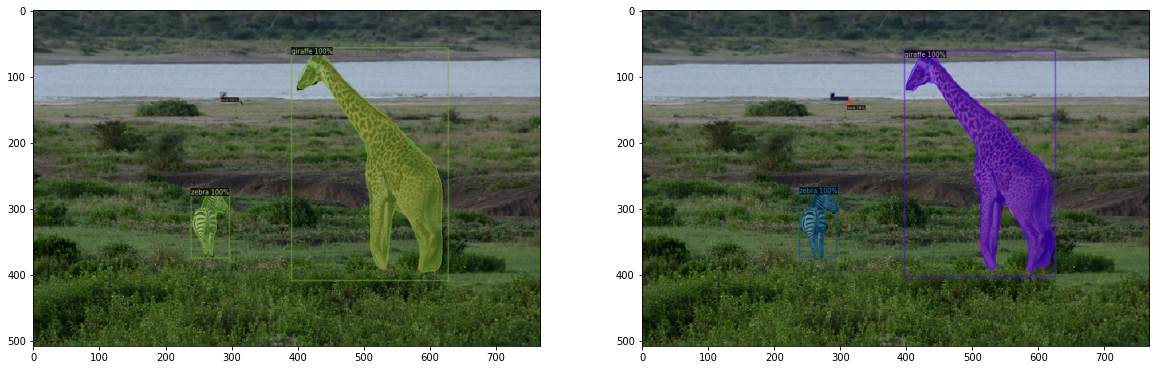

In [11]:

original_image= im
original_image = original_image[:, :, ::-1]
height, width = original_image.shape[:2]
image = torch.as_tensor(im.astype("float32").transpose(2, 0, 1))
input= [{'image':image}]
model_our.eval()
with torch.no_grad():
    out =model_our(input)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
A = out[0]['instances'].to("cpu")
out = v.draw_instance_predictions(A)
fig  = plt.figure(figsize=(20,10))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))


#
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs_mask = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out_mask = v.draw_instance_predictions(outputs_mask["instances"].to("cpu"))
fig.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(out_mask.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.savefig('fo2o.png', bbox_inches='tight')

In [13]:
all_ =glob.glob('/home/tookai-/Desktop/maralthesis/l/*.jpg')

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


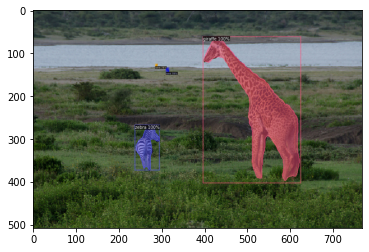

In [201]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs_mask = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out_mask = v.draw_instance_predictions(outputs_mask["instances"].to("cpu"))
fig.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(out_mask.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.savefig('fo2o.png', bbox_inches='tight')

In [200]:
all_

['/home/tookai-/Desktop/maralthesis/l/466602grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/180101grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/384808grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/577539grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/273198grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/351823grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/368294grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/136334grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/632grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/129135grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/552902grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/68093grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/197796grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/60052grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/367818grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/244019grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/134856grand.jpg',
 '/home/tookai-/Desktop/maralthesis/l/109976grand.jpg

In [10]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:

for i in all_:
    im_gt = cv2.imread(i)
    img_name =i.split('/')[-1].split('grand.jpg')[0]
    
    print(img_name)
    a =len(img_name)
    print(a)
    if a==3:
        num = '000000000'+img_name+'.jpg'
    elif a==4:
        num ='00000000'+img_name+'.jpg'
    elif a==5:
        num ='0000000'+img_name+'.jpg'
    elif a==6:
        num= '000000'+img_name+'.jpg'
    im = cv2.imread("/home/tookai-/payanname/DCT-Maskg/projects/DCT_Mask/datasets/coco/val2017/"+num)
    original_image= im
    original_image = original_image[:, :, ::-1]
    height, width = original_image.shape[:2]
    image = torch.as_tensor(original_image.astype("float32").transpose(2, 0, 1))
    input_= [{'image':image}]
    model_our.eval()
    with torch.no_grad():
        out_our =model_our(input_)
    
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    A = out_our[0]['instances'].to("cpu")
    out_our = v.draw_instance_predictions(A)

    outputs_mask = predictor(im)
    v1 = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out_maak = v1.draw_instance_predictions(outputs_mask["instances"].to("cpu"))

 
    f = plt.figure()
    f.set_figwidth(50)
    f.set_figheight(50)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0)
    plt.subplot(1, 3, 1),plt.imshow(cv2.cvtColor(out_maak.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 1).set_axis_off()
    plt.subplot(1, 3, 1).set_title('Maskrcnn')
    
    plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(out_our.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2).set_axis_off()
    plt.subplot(1, 3, 2).set_title('Our model')


    plt.subplot(1, 3, 3), plt.imshow(im_gt)
    plt.subplot(1, 3, 3).set_axis_off()
    plt.subplot(1, 3, 3).set_title('GT')
   
    plt.savefig('/home/tookai-/Desktop/maralthesis/fig2/'+num) # To save figure
#     plt.show()
    

    
        
    


466602
6


/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alw

180101
6
384808
6
577539
6
273198
6
351823
6
368294
6
136334
6
632
3
129135
6
552902
6
68093
5
197796
6
60052
5
367818
6
244019
6
134856
6
109976
6
222735
6
116825
6
297595
6


/usr/lib/python3/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


84362
5
257169
6
174018
6
319935
6
55072
5
261712
6
19742
5
227686
6
32887
5
227765
6
140640
6
530470
6
279145
6
371472
6
557172
6
440508
6
480275
6
541055
6
102356
6
488075
6
185802
6
322163
6
245915
6
438774
6
183104
6
226058
6
159977
6
259854
6
272049
6
477805
6
52891
5
331799
6
264968
6
516916
6
127517
6
50943
5
490470
6
289343
6
478862
6
529762
6
330790
6
42296
5
527750
6
67310
5
369812
6
291490
6
555009
6
499313
6
499768
6
213033
6
95786
5
324927
6
340175
6
80274
5
430048
6
1296
4
66635
5
253452
6
154004
6
21839
5
458663
6
284764
6
565469
6
546659
6
222863
6
476258
6
224222
6
15660
5
249219
6
68286
5
551780
6
372307
6
180135
6
445834
6
345466
6
506707
6
581482
6
44877
5
330396
6
472375
6
115946
6
246968
6
119088
6
512985
6
104424
6
402433
6
456559
6
539143
6
578545
6
37670
5
341196
6
289393
6
130465
6
365886
6
533493
6
508730
6
357941
6
165336
6
460927
6
421060
6
581317
6
320743
6
284623
6
553339
6
10092
5
566758
6
325031
6
270066
6
227985
6
885
3
466986
6
2153
4
72813
5
321333
6

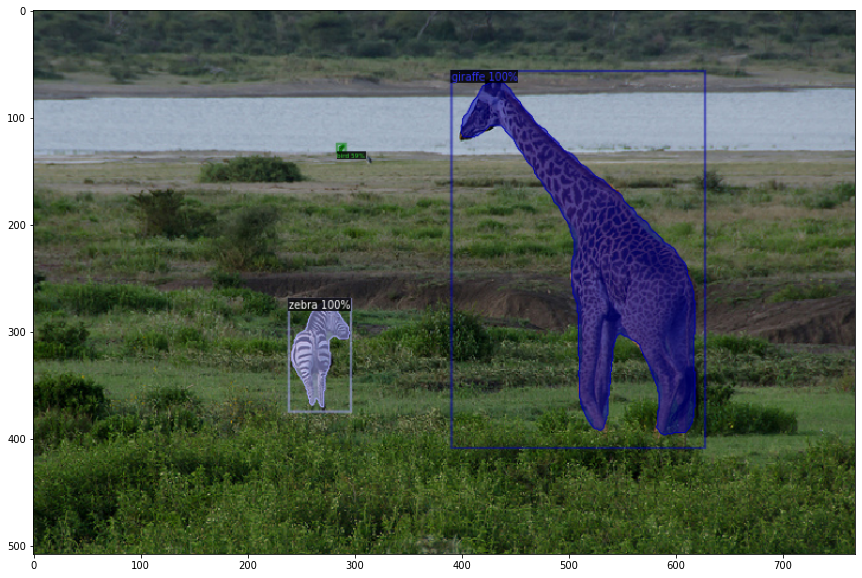

In [155]:
A = out[0]['instances']

In [156]:
type(out[0]['instances'])

detectron2.structures.instances.Instances

In [157]:
A

Instances(num_instances=5, image_height=612, image_width=612, fields=[pred_boxes: Boxes(tensor([[ 22.8577,  42.9092, 457.6628, 369.6435],
        [386.6023,  88.7010, 610.8750, 391.3732],
        [  2.8973,   8.2540, 612.0000, 609.3109],
        [449.8029, 200.5940, 612.0000, 390.7111],
        [258.8051, 102.9936, 386.7762, 257.9557]], device='cuda:0')), scores: tensor([0.9755, 0.8665, 0.6824, 0.5544, 0.5191], device='cuda:0'), pred_classes: tensor([45, 42, 60, 42, 50], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
      

In [82]:
model.eval()
predictor = DefaultPredictor(cfg)


Some model parameters or buffers are not found in the checkpoint:
roi_heads.mask_head.boundary_deconv.{bias, weight}
roi_heads.mask_head.boundary_fcn1.{bias, weight}
roi_heads.mask_head.boundary_fcn2.{bias, weight}
roi_heads.mask_head.boundary_predictor.{bias, weight}
roi_heads.mask_head.boundary_to_mask.{bias, weight}
roi_heads.mask_head.downsample.{bias, weight}
roi_heads.mask_head.mask_deconv.{bias, weight}
roi_heads.mask_head.mask_final_fusion.{bias, weight}
roi_heads.mask_head.mask_predictor.{bias, weight}
roi_heads.mask_head.mask_to_boundary.{bias, weight}
roi_heads.mask_head.p2_conv_shortcut.{bias, weight}
roi_heads.mask_head.wav_conv_level1.{bias, weight}
roi_heads.mask_head.wav_conv_level2.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  roi_heads.mask_head.deconv.{bias, weight}
  roi_heads.mask_head.predictor.{bias, weight}


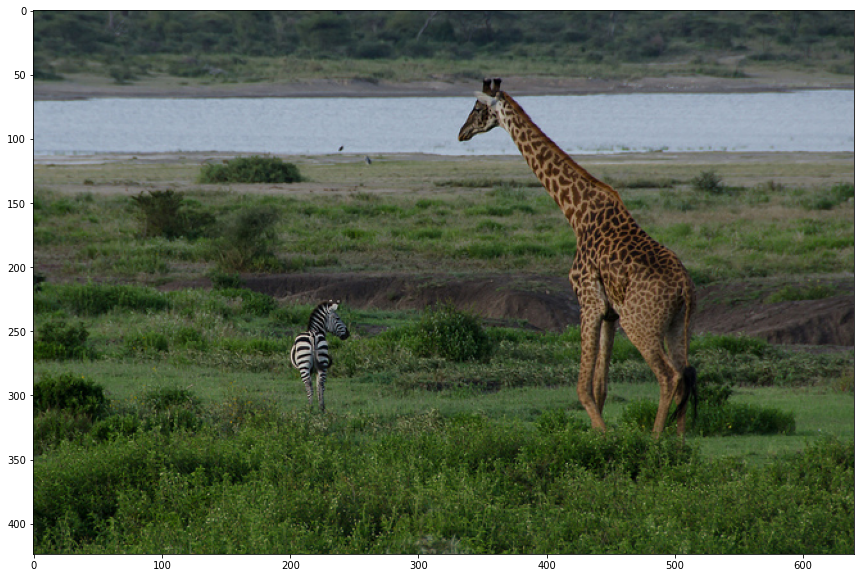

In [9]:

im = cv2.imread("/home/tookai-/payanname/jadid/BMaskR-CNN/projects/BMaskR-CNN/datasets/coco/val2017/000000159977.jpg")
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [22]:
python3 train_net.py --config-file configs/bmask_rcnn_R_50_FPN_1x.yaml --num-gpus 0 --eval-only MODEL.WEIGHTS ./output/bmask_rcnn_r50_1x

SyntaxError: invalid syntax (<ipython-input-22-dcdf1f90f640>, line 1)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [83]:
outputs = predictor(im)

In [84]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([45, 42, 42, 50, 50], device='cuda:0')
Boxes(tensor([[ 21.9964,  49.5664, 455.1530, 360.1757],
        [456.5241, 212.4542, 612.0000, 386.4918],
        [389.9612, 147.7838, 608.8571, 385.3859],
        [267.8333, 103.3141, 383.4184, 253.1896],
        [204.3607,  84.1297, 272.3453, 167.6196]], device='cuda:0'))


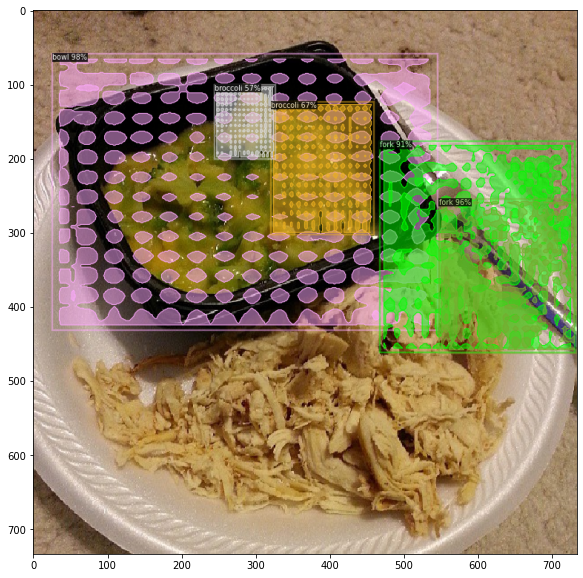

In [85]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.savefig('foo.png', bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-39-991e620cc48b>, line 1)